<a href="https://colab.research.google.com/github/Daprosero/ProcesamientoImagenes2025/blob/main/3.Tareas%20cl%C3%A1sicas%20de%20visi%C3%B3n%20por%20computador/2_Detecci%C3%B3n_de_Objetos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://medellin.unal.edu.co/eventos/panam2018/images/imagenes/organizan_2.png" width="40%">

# Procesamiento Digital de Imágenes

## Departamento de ingeniería eléctrica, electrónica y computación
## Sede Manizales

### Profesores Diego Pérez

In [1]:
%%capture
# Instalar y actualizar bibliotecas necesarias
!pip install gdown
!pip install roboflow
!pip install ipywidgets
!pip install ultralytics

In [2]:
# Importar bibliotecas a usar y deshabilitar WanDB

import os
import yaml
import gdown
import wandb
import shutil
import requests
from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import Image

os.environ['WANDB_DISABLED'] = 'true'
import wandb

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Descargar repositorio de aisladores

rf = Roboflow(api_key="EKato538chIPhManlH2u")
project = rf.workspace("universidad-nacional-6lud5").project("hard-hat-sample-88tip")
version = project.version(3)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Hard-Hat-Sample-3 in yolov9:: 100%|██████████| 491/491 [00:00<00:00, 2332.15it/s]


In [6]:
# Entrenar YOLOv9 para detección de aisladores

# Carga de modelo preentrenado
model = YOLO('yolov10s.pt')

# Entrenar el modelo
results = model.train(data='/content/Hard-Hat-Sample-3/data.yaml', epochs=2, imgsz=640, device=0)


Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Hard-Hat-Sample-3/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=2, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

100%|██████████| 5.35M/5.35M [00:00<00:00, 72.4MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 930.2±416.7 MB/s, size: 55.3 KB)


train: Scanning /content/Hard-Hat-Sample-3/train/labels... 210 images, 0 backgrounds, 0 corrupt: 100%|██████████| 210/210 [00:00<00:00, 2575.53it/s]

train: New cache created: /content/Hard-Hat-Sample-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1021.1±624.0 MB/s, size: 56.4 KB)


val: Scanning /content/Hard-Hat-Sample-3/valid/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 3115.89it/s]

val: New cache created: /content/Hard-Hat-Sample-3/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2      4.86G      4.179      14.22      3.519          6        640: 100%|██████████| 14/14 [00:07<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all         20         65      0.893      0.237      0.266      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2      5.11G      3.375       6.38      2.897          5        640: 100%|██████████| 14/14 [00:05<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         20         65        0.7      0.279      0.324       0.21



2 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 16.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 16.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10s summary (fused): 106 layers, 7,219,161 parameters, 0 gradients, 21.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


                   all         20         65      0.699      0.279      0.324       0.21
                  head          3         18      0.351      0.111      0.142      0.106
                helmet         17         45      0.748      0.725      0.831      0.522
                person          1          2          1          0          0          0
Speed: 0.2ms preprocess, 4.7ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train


In [7]:
# Validar el modelo entrenado

# Carga de modelo entrenado
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Realizar validación
validation_results = model.val(data='/content/Hard-Hat-Sample-3/data.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.5,
                               iou=0.6,
                               device='0')

Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10s summary (fused): 106 layers, 7,219,161 parameters, 0 gradients, 21.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1184.5±374.5 MB/s, size: 46.0 KB)


val: Scanning /content/Hard-Hat-Sample-3/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


                   all         20         65        0.5        0.1      0.305      0.225
                  head          3         18        0.5     0.0556      0.291      0.233
                helmet         17         45          1      0.244      0.622      0.441
                person          1          2          0          0          0          0
Speed: 0.2ms preprocess, 22.6ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val



image 1/1 /content/Hard-Hat-Sample-3/test/images/000034_jpg.rf.b506e2589b466f8e3fe1239722065f36.jpg: 640x640 1 helmet, 14.9ms
Speed: 2.3ms preprocess, 14.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


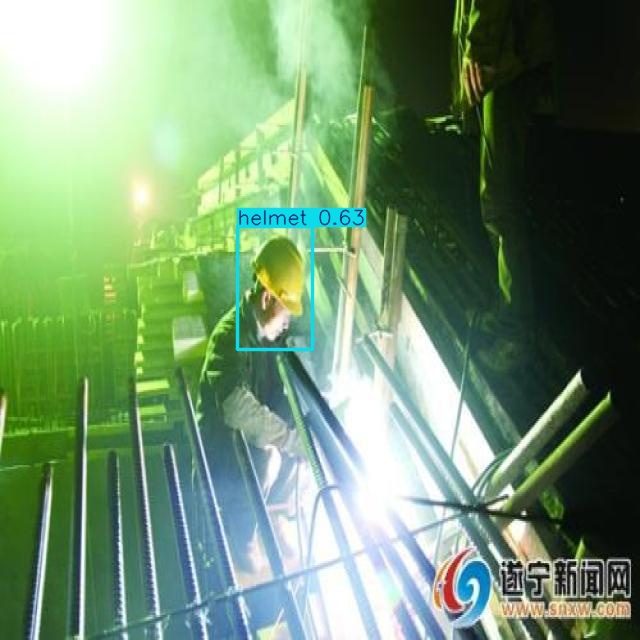

In [8]:
# Directorio de la imagen
imagen_dir = '/content/Hard-Hat-Sample-3/test/images/000034_jpg.rf.b506e2589b466f8e3fe1239722065f36.jpg'

# Realizar una inferencia
model.predict(imagen_dir, save=True, imgsz=640, conf=0.3, show_boxes=True, show_labels=True)

# Mostrar imagen sobre la cual se hizo inferencia
Image(filename="/content/runs/detect/predict/"+imagen_dir.rsplit('/', 1)[-1])

In [9]:
def descargar_imagen(image_url,num):

    # Specify the path and filename where you want to save the image
    download_path = "/content/downloaded_image"+str(num)+".jpg"

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    # Make a GET request to download the image
    response = requests.get(image_url, headers=headers, allow_redirects=True)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Open a file in binary mode to write the image data
        with open(download_path, "wb") as file:
            # Write the image data to the file
            file.write(response.content)
        print("Image downloaded successfully.")
    else:
        print("Error downloading the image.")

In [10]:
descargar_imagen("https://img.freepik.com/premium-photo/try-become-man-value-shot-young-man-working-construction-site-outside_590464-64393.jpg",1)

Image downloaded successfully.



image 1/1 /content/downloaded_image1.jpg: 640x512 1 helmet, 17.7ms
Speed: 3.8ms preprocess, 17.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict


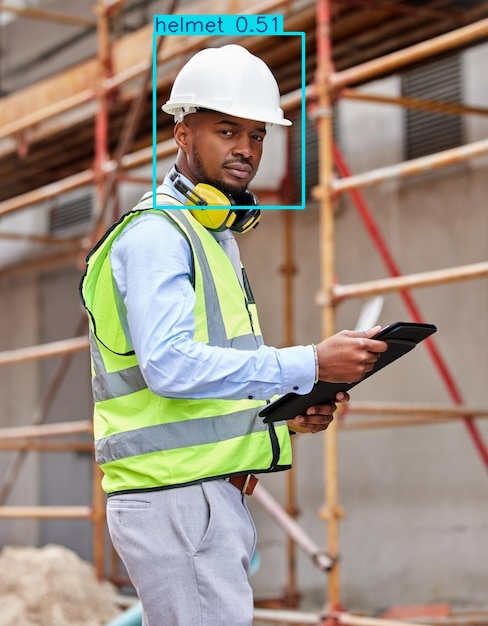

In [13]:
# Directorio de la imagen
imagen_dir = '/content/downloaded_image1.jpg'

# Realizar una inferencia
model.predict(imagen_dir, save=True, imgsz=640, conf=0.4, show_boxes=True, show_labels=True)

# Mostrar imagen sobre la cual se hizo inferencia
Image(filename="/content/runs/detect/predict/"+imagen_dir.rsplit('/', 1)[-1])